## **DSN BOOTCAMP HACK**

This is to  design and build a predictive model capable of accurately determining the probability of an individual having heart disease. The focus is on leveraging machine learning techniques to create a model that can analyze relevant features and provide reliable predictions.

This notebook covers:

* Loading the data
* Exploratory Data Analysis
* Model Training
* Making a submission

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install catboost -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.4 MB/s eta 0:00:00


## **Importing Libraries**

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score

## **DATASET**

In [6]:
path ="/content/drive/MyDrive/Colab Notebooks/DSN Bootcamp 2024"
train = pd.read_csv(path+"/Train Dataset .csv")
test = pd.read_csv(path+"/Test Dataset.csv")
sample_submission = pd.read_csv(path+"/Sample Submission.csv")

In [ ]:
train.shape, test.shape

((7303, 15), (2697, 14))

The above output shows the number of rows and columns for the train and test dataset. 15 variables are in the train dataset while the test dataset contains 14 variables.

In [ ]:
train.columns = [x.lower() for x in train.columns]
test.columns = [x.lower() for x in test.columns]

## **Data Exploration**

In [ ]:
train.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [ ]:
test.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


## **EDA**

In [ ]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

We don't have missing data in our dataset

In [ ]:
train.shape, test.shape

((7303, 15), (2697, 14))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

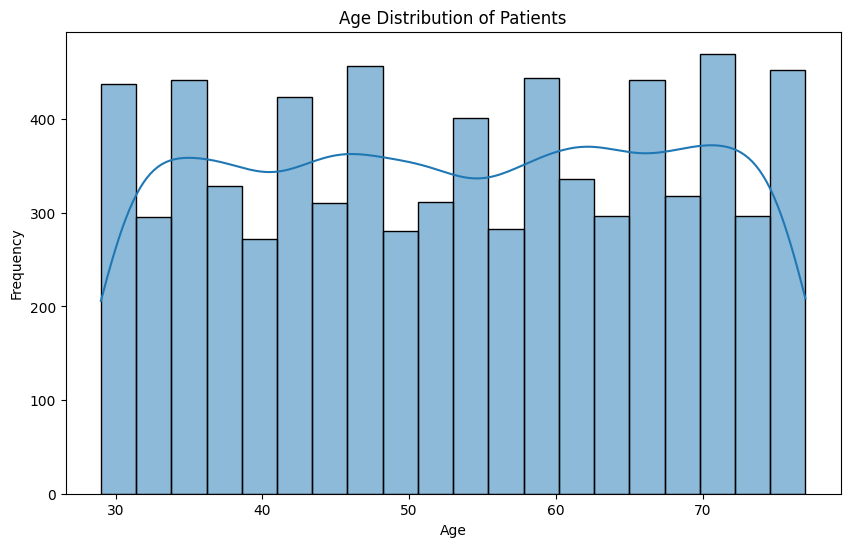

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train['age'], bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

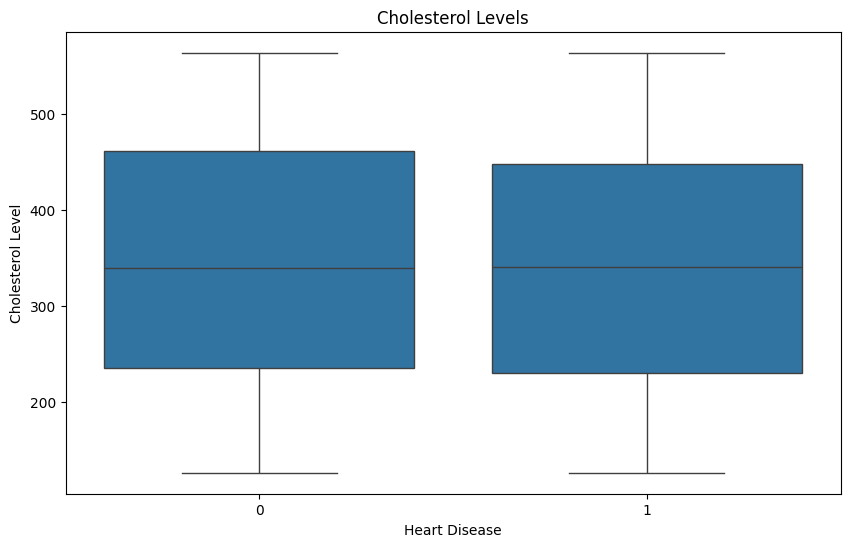

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='chol', data=train)
plt.title('Cholesterol Levels')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol Level')
plt.show()

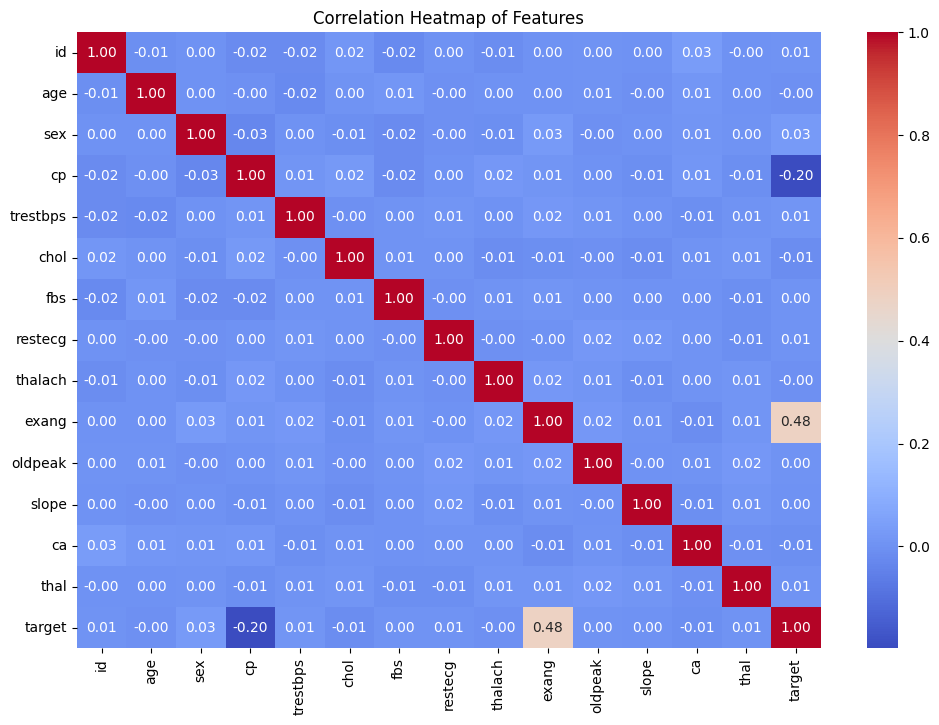

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

## **Model Training**

In [ ]:
model = CatBoostClassifier(iterations=420, depth = 10, learning_rate = 0.10178606153703441,
                           l2_leaf_reg = 78.54114803989148, random_strength = 7.614262125501167,
                           bagging_temperature = 0.31610739431242757, random_seed = 2024, verbose = False)

columns = ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'ca']

model.fit(train[columns], train['target'])

predictions = model.predict(test[columns])

In [ ]:
model_2 = RandomForestClassifier(n_estimators = 538, max_depth = 19, min_samples_split = 7,
                                 min_samples_leaf = 3, max_features = None,  bootstrap =True, random_state = 42)

columns_2 = ['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'ca']

model_2.fit(train[columns_2], train['target'])

predictions_2 = model_2.predict(test[columns_2])

## **Predict and Submit**

In [ ]:
submission_1 = pd.DataFrame()
submission_1['Id'] = test['id']
submission_1['target'] = np.where((predictions+predictions_2)>=1, 1, 0)
submission_1.to_csv('submission_final_1(ensemble).csv', index=False)

In [ ]:
submission_2 = pd.DataFrame()
submission_2['Id'] = test['id']
submission_2['target'] = predictions
submission_2.to_csv('submission_final_2(single).csv', index=False)

In [ ]:
submission_2.head()

,Id,target
0,16501,1
1,10444,1
2,14288,1
3,10409,1
4,17330,1
